In [1]:
# HOUSE pRicing


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
train_data = pd.read_csv('train.csv')
train_data.sample(4)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
489,490,180,RM,21.0,1526,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,86000
1380,1381,30,RL,45.0,8212,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,58500
1390,1391,20,RL,70.0,9100,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Normal,235000
342,343,90,RL,NaN,8544,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,87500


In [3]:
test_data = pd.read_csv('test.csv')
test_data.sample(4)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
276,1737,20,RL,NaN,15676,Pave,NaN,IR1,Low,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2009,WD,Normal
565,2026,120,FV,37.0,3435,Pave,Pave,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal
635,2096,30,RM,60.0,6756,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
573,2034,160,FV,24.0,2160,Pave,Pave,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal


In [4]:
datas = {'train_data':train_data, 
         ' test_data':test_data}

In [5]:
test_id = test_data.Id
test_id[:3]

0    1461
1    1462
2    1463
Name: Id, dtype: int64

## data analysis

In [6]:
[print(f'{name} shape: {data.shape} \n') for name, data in datas.items()]

train_data shape: (1460, 81) 

 test_data shape: (1459, 80) 



[None, None]

In [7]:
for data_name, data in datas.items():
     for col in data.columns:
        if data[col].isnull().sum()!=0:
            print(f'{data_name} - {col}: {data[col].isnull().sum()}')

train_data - LotFrontage: 259
train_data - Alley: 1369
train_data - MasVnrType: 8
train_data - MasVnrArea: 8
train_data - BsmtQual: 37
train_data - BsmtCond: 37
train_data - BsmtExposure: 38
train_data - BsmtFinType1: 37
train_data - BsmtFinType2: 38
train_data - Electrical: 1
train_data - FireplaceQu: 690
train_data - GarageType: 81
train_data - GarageYrBlt: 81
train_data - GarageFinish: 81
train_data - GarageQual: 81
train_data - GarageCond: 81
train_data - PoolQC: 1453
train_data - Fence: 1179
train_data - MiscFeature: 1406
 test_data - MSZoning: 4
 test_data - LotFrontage: 227
 test_data - Alley: 1352
 test_data - Utilities: 2
 test_data - Exterior1st: 1
 test_data - Exterior2nd: 1
 test_data - MasVnrType: 16
 test_data - MasVnrArea: 15
 test_data - BsmtQual: 44
 test_data - BsmtCond: 45
 test_data - BsmtExposure: 44
 test_data - BsmtFinType1: 42
 test_data - BsmtFinSF1: 1
 test_data - BsmtFinType2: 42
 test_data - BsmtFinSF2: 1
 test_data - BsmtUnfSF: 1
 test_data - TotalBsmtSF: 1

#### serious amount of NaNs
* train_data - Alley: 1369,  test_data - Alley: 1352    
* train_data - FireplaceQu: 690, test_data - FireplaceQu: 730 
* train_data - PoolQC: 1453, test_data - PoolQC: 1456
* train_data - Fence: 1179, test_data - Fence: 1169
* train_data - MiscFeature: 1406, test_data - MiscFeature: 1408

In [8]:
def preprocess_1(tr_df, ts_df):
    tr_df = tr_df.copy()
    ts_df = ts_df.copy()
    
    # drop
    
    cols = ['Id','Alley','FireplaceQu','PoolQC','Fence','MiscFeature']
    
    tr_df = tr_df.drop(cols, axis = 1)
    ts_df = ts_df.drop(cols, axis = 1)
    
    
    return tr_df, ts_df

In [9]:
# prepr1 = after preprocessing 1

train_data_prepr1, test_data_prepr1 = preprocess_1(train_data, test_data)

In [10]:
train_data_prepr1

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [11]:
datas_prepros1 = {'train_data_prepr1':train_data_prepr1, 
                  ' test_data_prepr1':test_data_prepr1}

for name_data, data in datas_prepros1.items():
    print('\n',name_data.upper(), ': \n')
    for col in data.columns:
        if data[col].isnull().sum()!=0:
            print(f'{col} - {data[col].isnull().sum()}')


 TRAIN_DATA_PREPR1 : 

LotFrontage - 259
MasVnrType - 8
MasVnrArea - 8
BsmtQual - 37
BsmtCond - 37
BsmtExposure - 38
BsmtFinType1 - 37
BsmtFinType2 - 38
Electrical - 1
GarageType - 81
GarageYrBlt - 81
GarageFinish - 81
GarageQual - 81
GarageCond - 81

  TEST_DATA_PREPR1 : 

MSZoning - 4
LotFrontage - 227
Utilities - 2
Exterior1st - 1
Exterior2nd - 1
MasVnrType - 16
MasVnrArea - 15
BsmtQual - 44
BsmtCond - 45
BsmtExposure - 44
BsmtFinType1 - 42
BsmtFinSF1 - 1
BsmtFinType2 - 42
BsmtFinSF2 - 1
BsmtUnfSF - 1
TotalBsmtSF - 1
BsmtFullBath - 2
BsmtHalfBath - 2
KitchenQual - 1
Functional - 2
GarageType - 76
GarageYrBlt - 78
GarageFinish - 78
GarageCars - 1
GarageArea - 1
GarageQual - 78
GarageCond - 78
SaleType - 1


In [12]:
just_cols_needed = train_data_prepr1.copy()

print("each columns' number of unique value \n")
for col in just_cols_needed.columns[:-1]:
    print(f'train_data - {col}: {len(train_data_prepr1[col].unique())}')
    print(f' test_data - {col}: {len(test_data_prepr1[col].unique())} \n')    

each columns' number of unique value 

train_data - MSSubClass: 15
 test_data - MSSubClass: 16 

train_data - MSZoning: 5
 test_data - MSZoning: 6 

train_data - LotFrontage: 111
 test_data - LotFrontage: 116 

train_data - LotArea: 1073
 test_data - LotArea: 1106 

train_data - Street: 2
 test_data - Street: 2 

train_data - LotShape: 4
 test_data - LotShape: 4 

train_data - LandContour: 4
 test_data - LandContour: 4 

train_data - Utilities: 2
 test_data - Utilities: 2 

train_data - LotConfig: 5
 test_data - LotConfig: 5 

train_data - LandSlope: 3
 test_data - LandSlope: 3 

train_data - Neighborhood: 25
 test_data - Neighborhood: 25 

train_data - Condition1: 9
 test_data - Condition1: 9 

train_data - Condition2: 8
 test_data - Condition2: 5 

train_data - BldgType: 5
 test_data - BldgType: 5 

train_data - HouseStyle: 8
 test_data - HouseStyle: 7 

train_data - OverallQual: 10
 test_data - OverallQual: 10 

train_data - OverallCond: 9
 test_data - OverallCond: 9 

train_data - 

## Fillna

In [13]:
train_data_prepr1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [14]:
print('====== [INFO] get only object columns ======= \n' )

objects_train = train_data_prepr1.select_dtypes('object').columns[:-1]
objects_test = test_data_prepr1.select_dtypes('object').columns
print('objects_train : ',len( objects_train),'\n',objects_train)
print(' objects_test : ', len( objects_train),'\n',objects_test)


print('\n ====== [INFO] get only number columns =======\n' )

number_train = train_data_prepr1.select_dtypes('number').columns[:-1]
number_test = test_data_prepr1.select_dtypes('number').columns
print('number_train : ', len( number_train),'\n',number_train)
print(' number_test : ', len(number_test),'\n',number_test)

====== [INFO] get only object columns ======= 

objects_train :  37 
 Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType'],
      dtype='object')
 objects_test :  37 
 Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond',

> both object columns are similar

In [15]:
print(' ====== [INFO]  get only OBJECT columns which has NaN values ========== \n')
object_nan_cols = []

for col in objects_train:
    if train_data_prepr1[col].isnull().sum()!=0 or test_data_prepr1[col].isnull().sum()!=0:
            object_nan_cols.append(col)
            print(f'train_data - {col}:{train_data_prepr1[col].isnull().sum()}')
            print(f' test_data - {col}:{test_data_prepr1[col].isnull().sum()} \n')

 ====== [INFO]  get only OBJECT columns which has NaN values ========== 

train_data - MSZoning:0
 test_data - MSZoning:4 

train_data - Utilities:0
 test_data - Utilities:2 

train_data - Exterior1st:0
 test_data - Exterior1st:1 

train_data - Exterior2nd:0
 test_data - Exterior2nd:1 

train_data - MasVnrType:8
 test_data - MasVnrType:16 

train_data - BsmtQual:37
 test_data - BsmtQual:44 

train_data - BsmtCond:37
 test_data - BsmtCond:45 

train_data - BsmtExposure:38
 test_data - BsmtExposure:44 

train_data - BsmtFinType1:37
 test_data - BsmtFinType1:42 

train_data - BsmtFinType2:38
 test_data - BsmtFinType2:42 

train_data - Electrical:1
 test_data - Electrical:0 

train_data - KitchenQual:0
 test_data - KitchenQual:1 

train_data - Functional:0
 test_data - Functional:2 

train_data - GarageType:81
 test_data - GarageType:76 

train_data - GarageFinish:81
 test_data - GarageFinish:78 

train_data - GarageQual:81
 test_data - GarageQual:78 

train_data - GarageCond:81
 test_data

In [16]:
print('===== [ INFO] get only NUMBER columns which contains NaN Values ======== \n')

number_nan_cols = []
for col in number_train:
    if train_data_prepr1[col].isnull().sum()!=0 or test_data_prepr1[col].isnull().sum()!= 0:
        number_nan_cols.append(col)
        print(f'train_data - {col}:{train_data_prepr1[col].isnull().sum()}')
        print(f' test_data - {col}:{test_data_prepr1[col].isnull().sum()} \n')
        
number_nan_cols

===== [ INFO] get only NUMBER columns which contains NaN Values ======== 

train_data - LotFrontage:259
 test_data - LotFrontage:227 

train_data - MasVnrArea:8
 test_data - MasVnrArea:15 

train_data - BsmtFinSF1:0
 test_data - BsmtFinSF1:1 

train_data - BsmtFinSF2:0
 test_data - BsmtFinSF2:1 

train_data - BsmtUnfSF:0
 test_data - BsmtUnfSF:1 

train_data - TotalBsmtSF:0
 test_data - TotalBsmtSF:1 

train_data - BsmtFullBath:0
 test_data - BsmtFullBath:2 

train_data - BsmtHalfBath:0
 test_data - BsmtHalfBath:2 

train_data - GarageYrBlt:81
 test_data - GarageYrBlt:78 

train_data - GarageCars:0
 test_data - GarageCars:1 

train_data - GarageArea:0
 test_data - GarageArea:1 



['LotFrontage',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea']

In [17]:
def preprocess_2(tr_df, ts_df, object_nan_cols, number_nan_cols):
    tr_df, ts_df = tr_df.copy(), ts_df.copy()
    
    for col in object_nan_cols:
        tr_df[col] = tr_df[col].fillna(tr_df[col].mode()[0])
        ts_df[col] = ts_df[col].fillna(ts_df[col].mode()[0])
    print('====  [INFO] Nans in OBJECT columns are dealed! ===')
    
    for col in number_nan_cols:
        tr_df[col] = tr_df[col].fillna(tr_df[col].median())
        ts_df[col] = ts_df[col].fillna(ts_df[col].median())
    print('====  [INFO] Nans in NUMBER columns are dealed! ===')
                                  
    
    
    return tr_df, ts_df   

In [18]:
train_data_prepr2, test_data_prepr2 = preprocess_2(train_data_prepr1, test_data_prepr1, object_nan_cols, number_nan_cols)

====  [INFO] Nans in OBJECT columns are dealed! ===
====  [INFO] Nans in NUMBER columns are dealed! ===


In [19]:
print(train_data_prepr2.isnull().sum().sum())
print(test_data_prepr2.isnull().sum().sum())

0
0


In [20]:
print(f'train_data: \n shape- {train_data_prepr2.shape}, Nans- {train_data_prepr2.isnull().sum().sum()}')
print(f'test_data: \n shape- {test_data_prepr2.shape} , Nans- {test_data_prepr2.isnull().sum().sum()}')

train_data: 
 shape- (1460, 75), Nans- 0
test_data: 
 shape- (1459, 74) , Nans- 0


## Converting Objects into Numeric

In [21]:
print(' ===== [INFO]  object를 numeric에 변환하기 위해 category가 많지 않은지 채크하기 위해 =====' )

train_unique_values_in_object_col = {}
for col in train_data_prepr2.select_dtypes('object').columns:
    train_unique_values_in_object_col[col]=len(train_data_prepr2[col].unique())

test_unique_values_in_object_col = {}
for col in test_data_prepr2.select_dtypes('object').columns:
    test_unique_values_in_object_col[col] = len(test_data_prepr2[col].unique())


print(train_unique_values_in_object_col, '\n')
print(test_unique_values_in_object_col)

 ===== [INFO]  object를 numeric에 변환하기 위해 category가 많지 않은지 채크하기 위해 =====
{'MSZoning': 5, 'Street': 2, 'LotShape': 4, 'LandContour': 4, 'Utilities': 2, 'LotConfig': 5, 'LandSlope': 3, 'Neighborhood': 25, 'Condition1': 9, 'Condition2': 8, 'BldgType': 5, 'HouseStyle': 8, 'RoofStyle': 6, 'RoofMatl': 8, 'Exterior1st': 15, 'Exterior2nd': 16, 'MasVnrType': 4, 'ExterQual': 4, 'ExterCond': 5, 'Foundation': 6, 'BsmtQual': 4, 'BsmtCond': 4, 'BsmtExposure': 4, 'BsmtFinType1': 6, 'BsmtFinType2': 6, 'Heating': 6, 'HeatingQC': 5, 'CentralAir': 2, 'Electrical': 5, 'KitchenQual': 4, 'Functional': 7, 'GarageType': 6, 'GarageFinish': 3, 'GarageQual': 5, 'GarageCond': 5, 'PavedDrive': 3, 'SaleType': 9, 'SaleCondition': 6} 

{'MSZoning': 5, 'Street': 2, 'LotShape': 4, 'LandContour': 4, 'Utilities': 1, 'LotConfig': 5, 'LandSlope': 3, 'Neighborhood': 25, 'Condition1': 9, 'Condition2': 5, 'BldgType': 5, 'HouseStyle': 7, 'RoofStyle': 6, 'RoofMatl': 4, 'Exterior1st': 13, 'Exterior2nd': 15, 'MasVnrType': 4, 'Exter

In [22]:
train_data_prepr2['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [23]:
test_data_prepr2['MSZoning'].unique()

array(['RH', 'RL', 'RM', 'FV', 'C (all)'], dtype=object)

In [24]:
le_train = LabelEncoder()
le_test = LabelEncoder()

In [25]:
train_data_prepr2[train_data_prepr2.select_dtypes('object').columns] = train_data_prepr2[train_data_prepr2.select_dtypes('object').columns].apply(le_train.fit_transform) 

In [26]:
test_data_prepr2[test_data_prepr2.select_dtypes('object').columns] = test_data_prepr2[test_data_prepr2.select_dtypes('object').columns].apply(le_test.fit_transform)

In [27]:
train_data_prepr2.tail(6)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1454,20,1,62.0,7500,1,3,3,0,4,0,...,0,0,0,0,0,10,2009,8,4,185000
1455,60,3,62.0,7917,1,3,3,0,4,0,...,0,0,0,0,0,8,2007,8,4,175000
1456,20,3,85.0,13175,1,3,3,0,4,0,...,0,0,0,0,0,2,2010,8,4,210000
1457,70,3,66.0,9042,1,3,3,0,4,0,...,0,0,0,0,2500,5,2010,8,4,266500
1458,20,3,68.0,9717,1,3,3,0,4,0,...,112,0,0,0,0,4,2010,8,4,142125
1459,20,3,75.0,9937,1,3,3,0,4,0,...,0,0,0,0,0,6,2008,8,4,147500


In [28]:
test_data_prepr2.tail(6)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1453,160,4,21.0,1526,1,3,3,0,4,0,...,34,0,0,0,0,0,6,2006,8,4
1454,160,4,21.0,1936,1,3,3,0,4,0,...,0,0,0,0,0,0,6,2006,8,4
1455,160,4,21.0,1894,1,3,3,0,4,0,...,24,0,0,0,0,0,4,2006,8,0
1456,20,3,160.0,20000,1,3,3,0,4,0,...,0,0,0,0,0,0,9,2006,8,0
1457,85,3,62.0,10441,1,3,3,0,4,0,...,32,0,0,0,0,700,7,2006,8,4
1458,60,3,74.0,9627,1,3,3,0,4,1,...,48,0,0,0,0,0,11,2006,8,4


In [29]:
train_data_prepr1.tail(6)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1454,20,FV,62.0,7500,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2009,WD,Normal,185000
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125
1459,20,RL,75.0,9937,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2008,WD,Normal,147500


In [30]:
test_data_prepr1.tail(6)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1453,160,RM,21.0,1526,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,6,2006,WD,Normal
1454,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,24,0,0,0,0,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,32,0,0,0,0,700,7,2006,WD,Normal
1458,60,RL,74.0,9627,Pave,Reg,Lvl,AllPub,Inside,Mod,...,48,0,0,0,0,0,11,2006,WD,Normal


## ! NANs 돼쓰! 
> convert into numeric 두 데이터 다 --> (label encoder??)    OK             
> feature selection ( correlation..)      
> scale             
> train

<AxesSubplot:>

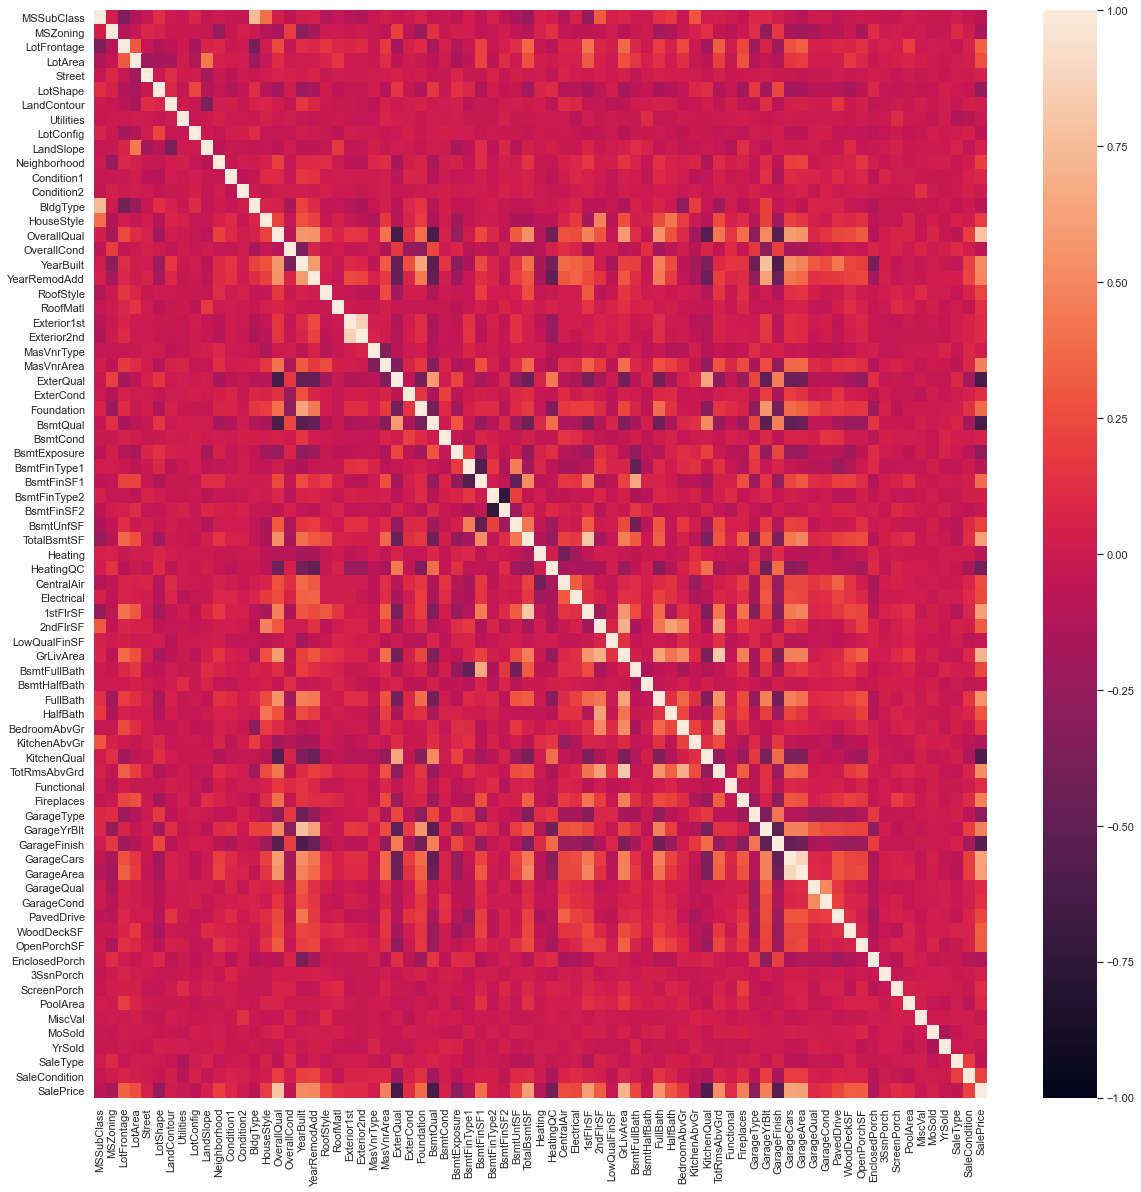

In [31]:
plt.figure(figsize = (20,20))
sns.heatmap(train_data_prepr2.corr(), vmin = -1)

####  train data - Highly correlated 
* MSSubClass -- & BldgType          
* YearBuild & GarageYearBuild --      
* TotRmsAbvGrd & GrLivArea       
* GarageCar -- & GarageArea       
* TotalBsmtUnfSF & 1sfFlSt --


In [32]:
def preprocess_final(tr_ds, ts_ds, drop_highCorr = False, scaler = False):
    tr_ds, ts_ds = tr_ds.copy(), ts_ds.copy()
    
    if drop_highCorr:
        tr_ds = tr_ds.drop(drop_highCorr, axis = 1)
        ts_ds = ts_ds.drop(drop_highCorr, axis = 1)
    
    X_train = tr_ds.drop('SalePrice', axis = 1)
    y_train = tr_ds.SalePrice
    
    if scaler:
        X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
        ts_ds = pd.DataFrame(scaler.fit_transform(ts_ds), columns = ts_ds.columns)
    
    
    
    return X_train, y_train, ts_ds

In [33]:
drop_highCorr = ['MSSubClass', 'GarageYrBlt', 'TotRmsAbvGrd', 'GarageCars','1stFlrSF']

X_train_final, y_train_final, test_final = preprocess_final(train_data_prepr2, test_data_prepr2, scaler= StandardScaler() )

In [34]:
X_train_final.shape, y_train_final.shape, test_final.shape

((1460, 74), (1460,), (1459, 74))

In [35]:
X_train_final.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.073375,-0.045532,-0.220875,-0.207142,0.064238,0.750731,0.314667,-0.02618,0.604670,-0.225716,...,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,0.313867,0.208502
1,-0.872563,-0.045532,0.460320,-0.091886,0.064238,0.750731,0.314667,-0.02618,-0.628316,-0.225716,...,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,0.313867,0.208502


In [36]:
# here is only train_data --> splitted X_train... for knowing accuracy
# if accuracy will be high --> we can apply that model for our test_data (test_final)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train_final, y_train_final, train_size = 0.82, random_state = 5)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1197, 74), (263, 74), (1197,), (263,))

## 1. TRAINING ML

In [229]:
!pip3 install xgboost
!pip3 install lightgbm


In [326]:

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR, SVR
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor



import warnings
warnings.filterwarnings(action = 'ignore')


from sklearn.metrics import r2_score


models = {
    '                    Linear Regression': LinearRegression(),
    '                  KNeigborsRegression': KNeighborsRegressor(n_neighbors=10),
    'Linear Regression (L2 Regularization)': Ridge(),
    'Linear Regression (L! Regularization)': Lasso(),
    '                       Neural Network': MLPRegressor(),
    'Support Vector Machine(Linear Kernel)': LinearSVR(),
    '   Support Vector Machine(RBF Kernel)': SVR(),
    '                        Decision Tree': DecisionTreeRegressor(),
    '                        Random Forest': RandomForestRegressor(),
    '                    Gradient Boosting': GradientBoostingRegressor(),
    '                              XGBoost': XGBRegressor(),
    
}
print('algorithms are imported!')

algorithms are imported!


In [345]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f'{name} is trained!')

                    Linear Regression is trained!
                  KNeigborsRegression is trained!
Linear Regression (L2 Regularization) is trained!
Linear Regression (L! Regularization) is trained!
                       Neural Network is trained!
Support Vector Machine(Linear Kernel) is trained!
   Support Vector Machine(RBF Kernel) is trained!
                        Decision Tree is trained!
                        Random Forest is trained!
                    Gradient Boosting is trained!
                              XGBoost is trained!


In [346]:
y_pred_dict = {}
r2_score_dict = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_pred_dict[name] = y_pred
    
    score = r2_score(y_test, y_pred)*100
    r2_score_dict[name] = score
    
    print('{} acc: {:.2f} %'.format(name, score))
    

                    Linear Regression acc: 83.83 %
                  KNeigborsRegression acc: 75.08 %
Linear Regression (L2 Regularization) acc: 83.83 %
Linear Regression (L! Regularization) acc: 83.82 %
                       Neural Network acc: -504.99 %
Support Vector Machine(Linear Kernel) acc: -518.59 %
   Support Vector Machine(RBF Kernel) acc: -8.36 %
                        Decision Tree acc: 81.53 %
                        Random Forest acc: 88.13 %
                    Gradient Boosting acc: 89.16 %
                              XGBoost acc: 87.25 %


## Trials ML -- >
> dropped high correlated columns, without scaling


 Linear Regression acc: 79.18 %                         
                  KNeigborsRegression acc: 67.75 %                                     
Linear Regression (L2 Regularization) acc: 79.18 %                   
Linear Regression (L! Regularization) acc: 79.18 %                     
                       Neural Network acc: 60.66 %                        
Support Vector Machine(Linear Kernel) acc: 56.39 %                     
   Support Vector Machine(RBF Kernel) acc: -5.80 %                        
                        Decision Tree acc: 74.84 %  
                        
                        Random Forest acc: 84.15 %                     
                    Gradient Boosting acc: 84.46 %                   
                              XGBoost acc: 82.82 % 
                              
                              
                              
                              
> dropped high correlated columns, MinMaxScaled       

   Linear Regression acc: -266189898150846140514304.00 %             
                  KNeigborsRegression acc: 69.41 %                                                                  
Linear Regression (L2 Regularization) acc: 80.01 %             
Linear Regression (L! Regularization) acc: -0.02 %            
                       Neural Network acc: 70.39 %              
Support Vector Machine(Linear Kernel) acc: 80.40 %             
   Support Vector Machine(RBF Kernel) acc: 71.25 % 
   
                        Decision Tree acc: 81.22 %
                        Random Forest acc: 85.19 %  
                    Gradient Boosting acc: 84.52 %
                              XGBoost acc: 82.82 %  
                              
                              
> dropped high correlated columns, StandardScaled  <--------------  this
 
      Linear Regression acc: 88.10 %                 
                  KNeigborsRegression acc: 80.18 %  
                  
Linear Regression (L2 Regularization) acc: 88.09 %                 
Linear Regression (L! Regularization) acc: 88.10 %  
                       Neural Network acc: -506.58 %             
Support Vector Machine(Linear Kernel) acc: -518.27 %                 
   Support Vector Machine(RBF Kernel) acc: -9.10 %                
                        Decision Tree acc: 81.15 %  
                        
                        Random Forest acc: 87.79 %               
                    Gradient Boosting acc: 88.96 %                 
                              XGBoost acc: 89.13 %    <------------ the most high accuracy                 

> NON dropped high correlated columns, withoud scaling

 Linear Regression acc: 78.89 %            
                  KNeigborsRegression acc: 68.81 %             
Linear Regression (L2 Regularization) acc: 78.89 %             
Linear Regression (L! Regularization) acc: 78.89 %                 
                       Neural Network acc: 64.93 %             
Support Vector Machine(Linear Kernel) acc: 29.86 %              
   Support Vector Machine(RBF Kernel) acc: -5.80 %                 
                        Decision Tree acc: 76.06 %  
                        
                        Random Forest acc: 82.75 %               
                    Gradient Boosting acc: 83.71 %                 
                              XGBoost acc: 81.33 %    
 
 > NON dropped high correlated columns, MinMaxScaled
 
   Linear Regression acc: -203272020887281210490880.00 %              
                  KNeigborsRegression acc: 70.66 %                
Linear Regression (L2 Regularization) acc: 80.08 %                
Linear Regression (L! Regularization) acc: -0.02 %                  
                       Neural Network acc: 70.97 %                  
Support Vector Machine(Linear Kernel) acc: 80.27 %                
   Support Vector Machine(RBF Kernel) acc: 72.80 %             
                        Decision Tree acc: 77.76 %    
                        
                        Random Forest acc: 83.86 %
                    Gradient Boosting acc: 84.27 %
                              XGBoost acc: 83.74 %
                              
> NON dropped high correlated columns, StandardScaled <--------------  this

Linear Regression acc: 88.11 %                
                  KNeigborsRegression acc: 82.18 %               
Linear Regression (L2 Regularization) acc: 88.12 %                 
Linear Regression (L! Regularization) acc: 88.12 %                 
                       Neural Network acc: -506.96 %                 
Support Vector Machine(Linear Kernel) acc: -518.36 %                 
   Support Vector Machine(RBF Kernel) acc: -9.09 %              
                        Decision Tree acc: 77.44 %                
                        
                        Random Forest acc: 89.24 %  <------------ the most high accuracy 
                        Gradient Boosting acc: 89.13 %  <------------ the most high accuracy   THISSS
                              XGBoost acc: 89.06 %

## Apply for real test data (test_final)-> predict

In [347]:
from sklearn.ensemble import GradientBoostingRegressor

model_final = GradientBoostingRegressor()

In [348]:
model_final.fit(X_train, y_train)


y_test_data_pred = model_final.predict(test_final)

In [349]:
y_test_data_pred

array([128315.84658595, 162762.45512309, 179020.23058733, ...,
       173913.35746979, 123306.39516275, 244161.16876801])

In [352]:
test_id

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [354]:
zipped = list(zip(test_id,y_test_data_pred))

df_test_submit = pd.DataFrame(zipped, columns = ['Id', 'SalePrice'])
df_test_submit

,Id,SalePrice
0,1461,128315.846586
1,1462,162762.455123
2,1463,179020.230587
3,1464,186970.421141
4,1465,205157.465789
...,...,...
1454,2915,81776.196347
1455,2916,78909.717355
1456,2917,173913.357470
1457,2918,123306.395163


In [355]:
import pickle 
filename = 'finalized_model.pkl'
pickle.dump(model_final, open(filename, 'wb'))

In [357]:
df_test_submit.to_csv('house_price_compet_submission.csv', index = False)

In [358]:
read_df = pd.read_csv('house_price_compet_submission.csv')
read_df

,Id,SalePrice
0,1461,128315.846586
1,1462,162762.455123
2,1463,179020.230587
3,1464,186970.421141
4,1465,205157.465789
...,...,...
1454,2915,81776.196347
1455,2916,78909.717355
1456,2917,173913.357470
1457,2918,123306.395163
